<H1>Bidirectional connections as a function of the distance </H1>
<P>
We will analyze the probability of finding bidirectionally connected inhibitory synapses are over-represented as a function of the intersomatic distance.</P>

In [1]:
%pylab inline
import warnings
from inet import DataLoader, __version__

from inet.utils import II_slice
print('Inet version {}'.format(__version__))

Populating the interactive namespace from numpy and matplotlib
Inet version 0.0.15


Read filename from the dataset, that contains 2 or more PV(+)-interneurons

In [3]:
# use filenames in the dataset to read list of distances to be read
mydataset = DataLoader('../data/PV/')

count_pv = lambda x : len([i for i in range(len(mydataset)) if int(mydataset.filename(i)[0])==x])
    
pv_id = [ idx for idx in range(len(mydataset)) if int(mydataset.filename(idx)[0])>1 ]
print('{} experiments with 2 or more PV-cells\n'.format(len(pv_id)))

for i in range(2,5):    
    print('{:2d} experiments with {} PV-cells'.format(count_pv(i), i))

 211 syn  files loaded
50 experiments with 2 or more PV-cells

40 experiments with 2 PV-cells
 9 experiments with 3 PV-cells
 1 experiments with 4 PV-cells


<H2> Load all distances from all connected PV cells</H2>

<P> Read intersomatic distances between PV(+) interneurons. Some distances may be 
missing, and the function will return a warning.</P>

In [4]:
# read distances from between inhibitory neurons
def read_dist(fname):
    """
    get distances between inhibitory pairs of neurons
    from a matrix of intersomatic distances.
    
    Argument:
    
    fname: string
        the matrix name to that contains the connected synapses. It is
        the name of the file without extension (e.g., *.syn).
        
    It will through a warning if the matrix of distances is not added.
    """
    mypath = '../data/PV/' + fname + '.dist'
    
    try:
        D = np.loadtxt(mypath)
        D = II_slice(D, int(fname[0]))
        idx = np.where(~np.eye(D.shape[0], dtype = bool))
        mydist = np.abs(D[idx]).tolist()
        
        return(mydist)
    
    except IOError:
        warnings.warn(fname + '.dist not found!')
        return([])
    

In [6]:
# collect all intersomatic distances in a single list
dist_tested = list()
for i in pv_id:
    dist_tested +=read_dist( mydataset.filename(i) )


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 2_170411_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 2_171127_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 2_171116_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 2_171116_01.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 2_171127_01.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 2_171120_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 4_171121_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 3_171121_01.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: UserWarning: 2_171120_01.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykern

In [8]:
print('{} total distances read'.format(len(dist_tested))) # total distances

106 total distances read


<H2> Plot the histogram of recorded distances</H2>

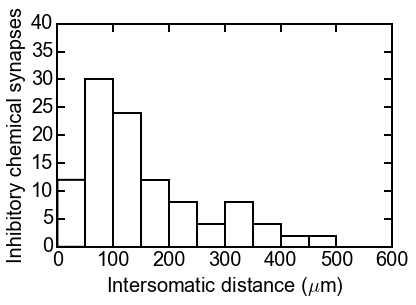

In [9]:
mybins = arange(0,600, 50)

plt.hist(dist_tested, bins = mybins, facecolor='white', lw=2);
plt.ylim(ymax=40);
plt.ylabel('Inhibitory chemical synapses');
plt.xlabel('Intersomatic distance ($\mu$m)');

<H2>Distances in recurrently connected inhibitory neurons</H2>

<P> We now collect only recurrently connected inhibitory neurons (i.e., bidirectionally connected).</P>

In [10]:
def read_rec_dist(fname):
    """
    get distances between bidirectionally connected interneurons
    from a matrix of intersomatic distances.
    
    Argument:
    fname: string
        the matrix name to that contains the connected synapses (*.syn)
    """
    

    mydistpath = '../data/PV/' + fname + '.dist'

    # load distance matrix (D)
    try:
        D = II_slice(np.loadtxt(mydistpath), int(fname[0]))
        
    except IOError:
        warnings.warn(mydistpath + ' not found!')
        return([])
    
    # load synapse matrix (S)
    try: 
        S = np.loadtxt('../data/PV/' + fname + '.syn')
        
    except IOError:
        warnings.warn(fname + ' not found!')
        return([])
    
    S = II_slice(S, int(fname[0]) )
    S[S==2] = 0 # remove gaps
    S[S==3] = 1 # remove gaps in chemical
     

    x,y = np.nonzero(S)
    ids = zip(x,y)
    mydist = list()
    if ids>0:
        for i,j in ids:
            if S[j,i] == 1:
                mydist.append( D[i,j] )
     
    #print( np.unique(np.abs(mydist)) )  

    return( np.unique(np.abs(mydist)).tolist() )


In [11]:
# Number of bidirectionally connected interneurons is computed in the counter
mydataset.motif['ii_c2']

{'found': 14, 'tested': 73}

In [12]:
# select experiments with bidirectional motifs
bidirectional_id = [i for i in range(len(mydataset)) if mydataset.motifs(i)['ii_c2']['found']]

for i in bidirectional_id:
    print('Experiment {:3d}, filename: {}'.format(i, mydataset.filename(i)))

Experiment   3, filename: 3_170824_01
Experiment  38, filename: 2_171116_02
Experiment  50, filename: 3_170829_01
Experiment  51, filename: 2_171002_01
Experiment  66, filename: 3_170830_02
Experiment  72, filename: 2_170328_02
Experiment  82, filename: 2_170907_01
Experiment  93, filename: 2_170315_01
Experiment 150, filename: 4_171121_02
Experiment 151, filename: 3_171121_01
Experiment 176, filename: 2_160523_02
Experiment 177, filename: 2_170329_01
Experiment 181, filename: 2_171102_01
Experiment 202, filename: 2_171124_01


We collect the intersomatic distances between recurently connected inhibitory neurons. We will plot
them against the total number of possible bidirectionally connected neurons. 

In [14]:
dist_found = list()
for i in bidirectional_id:
    dist_found += read_rec_dist( fname = mydataset.filename(i) )

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: UserWarning: ../data/PV/2_171116_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: UserWarning: ../data/PV/4_171121_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: UserWarning: ../data/PV/3_171121_01.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: UserWarning: ../data/PV/2_171102_01.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: UserWarning: ../data/PV/2_171124_01.dist not found!


To plot the total number of possible bidirectional connections we could simply divide the total number by two.
Alternatively, we can take only the positive (or negative) distances. Remember that positive distances are
distances from neuron A -> B and negative distances are from B -> A. Either one of these is the number of 
positive bidirectional connections (not both of them!).

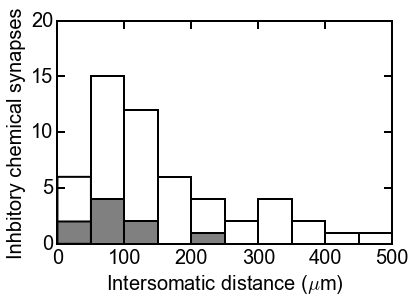

In [15]:
mybins = arange(0,550, 50)
bid_tested = np.unique(dist_tested) # like dividing by two
plt.hist(bid_tested, bins = mybins, facecolor='white', lw=2);
plt.ylim(ymax=20);
plt.ylabel('Inhbitory chemical synapses');
plt.xlabel('Intersomatic distance ($\mu$m)');

plt.hist(dist_found, bins = mybins, facecolor='gray', lw=2);
